# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: preficting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [45]:
# Import Tensorflow

import tensorflow as tf
print(tf.__version__)

2.16.1


## Creating data to view and fit

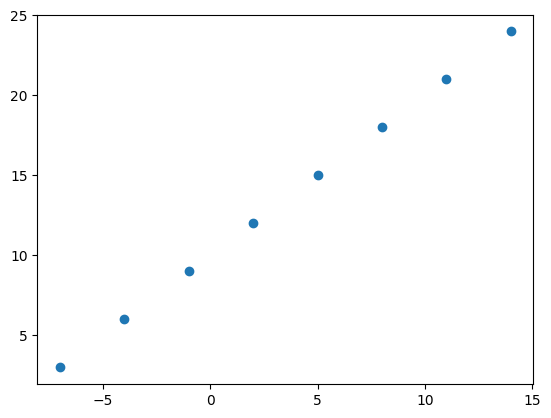

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);


In [47]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [48]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedrooom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [49]:
X[0], Y[0]

(-7.0, 3.0)

In [50]:
X[1], Y[1]

(-4.0, 6.0)

In [51]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [52]:
X[0].ndim

0

In [53]:
X[0], Y[0]

(-7.0, 3.0)

In [54]:
# Turn our Numpy arrays into tensors

X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [55]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

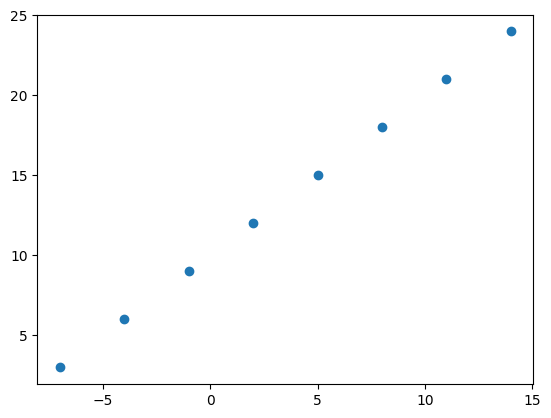

In [56]:
plt.scatter(X, Y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compliling a model** - define the loss function (in other words, the function which tells out model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and label)

In [57]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Tensors expect multidimetional vectors
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)


X = tf.constant(X)
Y = tf.constant(Y)

In [58]:
# Turn our NumPy arrays into tensors with dtype float32

X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

### Steps in modelling with TensorFlow

1. Construct or import a pretrained model relevant to your problem
2. Complie the model (prepare it to be used with data)
   1. **Loss** - How wrong your model's predictions are compared to the truth labels (you want to minimise this)
   2. **Optimizer** - How your model should update its internal patterns to better its predictions
   3. **Metrics** - Human interpretable values for how well your model is doing
3. Fit the model to the training data so it can discover patterns
   1. **Epochs** - How many times the model will go through all of the training examples
4. Evaluate the model on the test data (How reliable are our model's predictions?)

In [59]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# It can be done with model.add(tf.keras.layers.Dense(1)) instead of passing the list inside the model

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"]
              ) 

# 3. Fit the model
model.fit(X, Y, epochs=5)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 14.9146 - mae: 14.9146
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.7821 - mae: 14.7821
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.6496 - mae: 14.6496
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.5171 - mae: 14.5171
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.3846 - mae: 14.3846


### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Create a model** - Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from). 

In [60]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (this time we'll train for longer)

model.fit(X, Y, epochs=100) # We're trying to improve loss to be lower than 100

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 12.1129 - mae: 12.1129
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.9804 - mae: 11.9804
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.8479 - mae: 11.8479
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.7154 - mae: 11.7154
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.5829 - mae: 11.5829
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.4504 - mae: 11.4504
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.3179 - mae: 11.3179
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.1854 - mae: 11.1854
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.0529 - mae: 11.0529
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.9204 - mae: 10.9204
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.7879 - mae: 10.7879
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.6554 - mae: 10.6554
Epoch 13/100
1/1 ━━━━━━━

In [61]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [62]:
# Let's see if our model's prediction has improved...

import numpy as np

# Prepare the input data for prediction
input_data = np.array([17.0]).reshape(-1, 1)  # Reshape the data

# Make a prediction
prediction = model.predict(input_data)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[29.59474]]


In [63]:
# Let's see if we can make another change to improve the model

# 1. Create the model with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# 3. Fit the model (this time we'll train for longer)

model.fit(X, Y, epochs=100) # We're trying to improve loss to be lower than 100

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - loss: 13.6775 - mae: 13.6775
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.9953 - mae: 12.9953
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.3105 - mae: 12.3105
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.6192 - mae: 11.6192
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.9191 - mae: 10.9191
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.2080 - mae: 10.2080
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.4835 - mae: 9.4835
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.7427 - mae: 8.7427
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.9831 - mae: 7.9831
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2017 - mae: 7.2017
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.6686 - mae: 6.6686
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8291 - mae: 6.8291
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [64]:
# Let's see if our model's prediction has improved...

import numpy as np

# Prepare the input data for prediction
input_data = np.array([17.0]).reshape(-1, 1)  # Reshape the data

# Make a prediction
prediction = model.predict(input_data)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[25.798523]]


In [65]:
# The alteration in the learning rate was the most important hiperparameter

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate ir -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evalueate it ....
```


When it comes to evaluation.. there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of the model line up against the ground truth (the original labels)

In [66]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [67]:
# Make labels for the dataset

Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

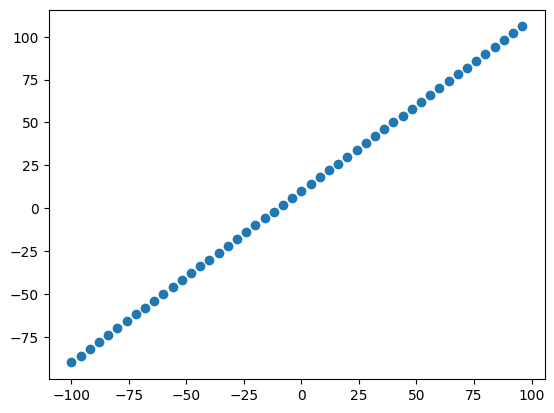

In [68]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X, Y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10 - 15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10 - 15% of the total data available.

In [69]:
# Check the length of how many samples we have
len(X)

50

In [70]:
# Split the data into train and test sets
x_train = X[:40] # Fist 40 are training samples (80% of the data)
y_train = Y[:40]

x_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = Y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets..., let's visualize it again!

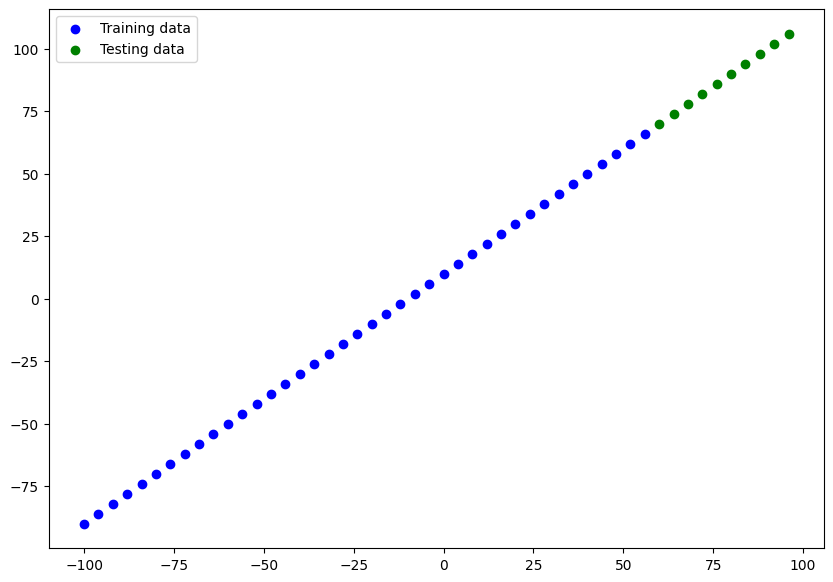

In [71]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend();

### Visualizing the model

In [72]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)




/Users/willianribeiro/Documents/GitHub/tensorflow-experiments/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, checkout MIT introduction to deeplearning video

In [74]:
# Let's fit our model to the training data
model.fit(x_train, y_train, epochs=100, verbose=0)

In [75]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

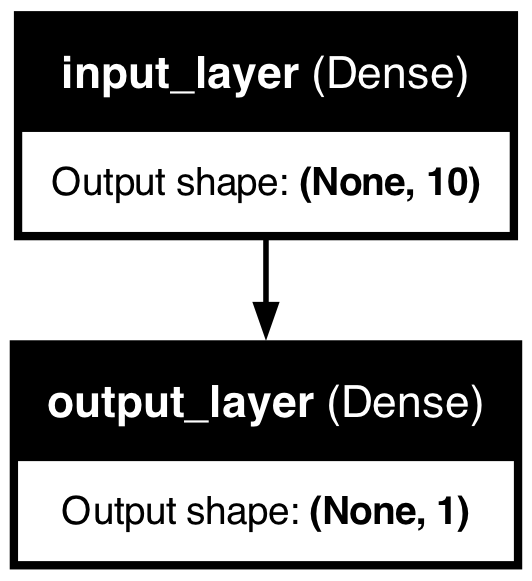

In [76]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_layer_names=True)

### Visualizing our model's prediction

To visualize our model's prediction, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model prediction)

In [77]:
# make some predictions
y_pred = model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[37.600475],
       [40.000385],
       [42.40029 ],
       [44.800198],
       [47.2001  ],
       [49.600014],
       [51.999924],
       [54.399826],
       [56.799732],
       [59.19964 ]], dtype=float32)

In [78]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If  you fell like you're going to reuse some kind of functionality in the future, it's good to transform it into a function

In [79]:
# Let's create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    # Show a legend
    plt.legend();
    

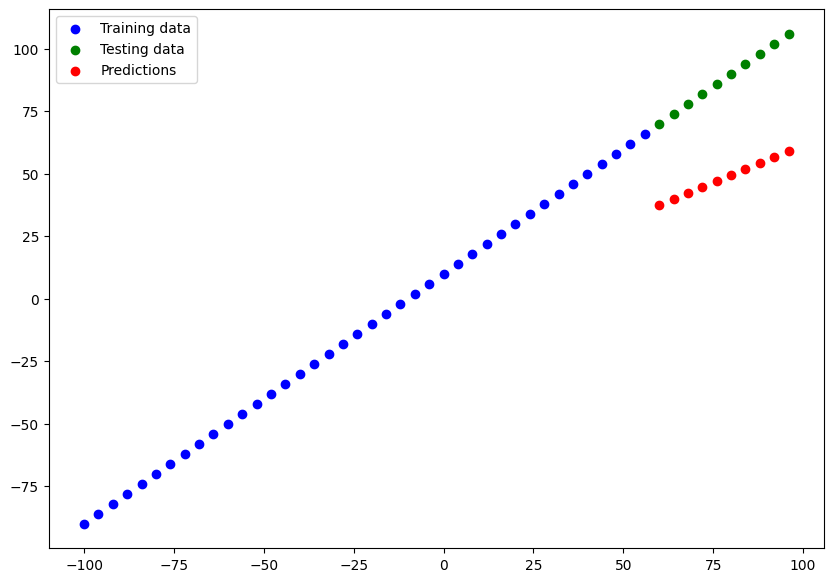

In [80]:
plot_predictions()

### Evaluate our model's prediction with regression evaluate metrics

Depending on the problem you're working on there's gonna be different evaluation metrics to evaluate your model's performance.

Since we're working with a regression model, two of the main metrics are:

* **MAE (Mean absolute error)** - "on average, how wrong is each of our model,s prediction"
* **MSE (Mean square error)** - "square the average errors"


In [81]:
# Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 39.5999 - mae: 39.5999


[39.59994125366211, 39.59994125366211]

In [25]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([39.68337 , 42.221138, 44.75891 , 47.296684, 49.834457, 52.37223 ,
       54.910004, 57.447777, 59.985546, 62.523323], dtype=float32)>

In [32]:
y_pred

array([[39.68337 ],
       [42.221138],
       [44.75891 ],
       [47.296684],
       [49.834457],
       [52.37223 ],
       [54.910004],
       [57.447777],
       [59.985546],
       [62.523323]], dtype=float32)

In [24]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [87]:
# Calculate the mean absolute error
mae = tf.metrics.MAE(y_test, tf.constant(y_pred))
print(mae)

# Note to myself, to get the MAE value as a scalar
mae_value = tf.reduce_mean(mae)
print(mae_value)

tf.Tensor(
[32.399525 33.999615 35.59971  37.199802 38.7999   40.399986 42.000076
 43.600174 45.200268 46.80036 ], shape=(10,), dtype=float32)
tf.Tensor(39.59994, shape=(), dtype=float32)


In [88]:
mse = tf.metrics.MSE(y_test, y_pred)
print(mse)
mse_value = tf.reduce_mean(mse)
print(mse_value)

tf.Tensor(
[1049.7292 1155.9738 1267.3392 1383.8253 1505.4323 1632.1589 1764.0065
 1900.9752 2043.0642 2190.274 ], shape=(10,), dtype=float32)
tf.Tensor(1589.2778, shape=(), dtype=float32)


### Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more chance to find a pattern in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs 

In [89]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)